In [1]:
#import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

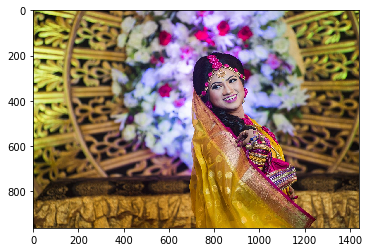

In [2]:
girl_image = cv2.imread('images/girl.jpg')
#showing rgb image
girl_image_rgb = cv2.cvtColor(girl_image, cv2.COLOR_BGR2RGB)
plt.imshow(girl_image_rgb)

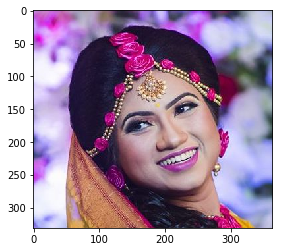

In [3]:
#now read only girl face image
girl_face_image = cv2.imread('images/girl_face.jpg')
face_image_rgb = cv2.cvtColor(girl_face_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_image_rgb)
height, width, channels = face_image_rgb.shape

In [4]:
#eval method functionally
mystring = 'sum'
func = eval(mystring)
func([1,2,3])


6

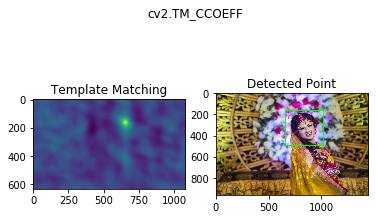

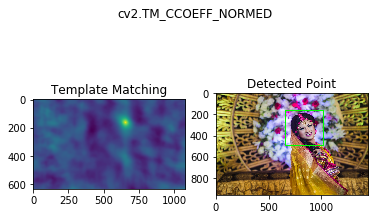

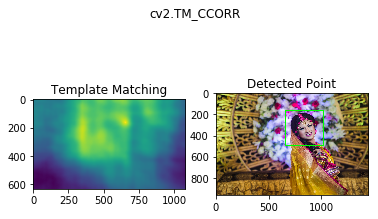

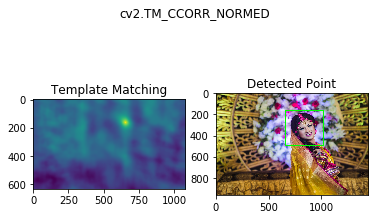

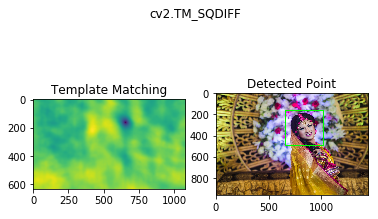

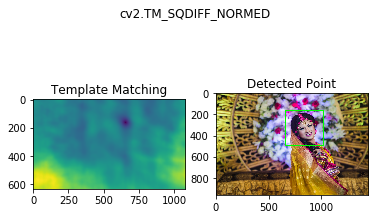

In [6]:
Methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
#print(len(Methods))
for m in Methods:
    #create a cpy of the image
    full_copy = girl_image_rgb.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy, girl_face_image, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (0,255,0), 10)
    
    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)  
    plt.show()
    print('\n')